In [1]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import shap

from sklearn.metrics import classification_report

In [2]:
X_train = pd.read_csv('train_trans.csv')
y_train = X_train['FLAG']
X_val = pd.read_csv('val_trans.csv')
y_val = X_val['FLAG']
X_test = pd.read_csv('test_trans.csv')
y_test = X_test['FLAG']

In [3]:
X_train.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns
X_val.drop(columns=['Unnamed: 0','FLAG'], inplace = True)
X_test.drop(columns=['Unnamed: 0','FLAG'], inplace = True)

In [4]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [5]:
train_pred = lr.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6205
           1       0.96      0.92      0.94      1765

    accuracy                           0.97      7970
   macro avg       0.97      0.95      0.96      7970
weighted avg       0.97      0.97      0.97      7970



In [6]:
val_pred = lr.predict(X_val)
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       690
           1       0.94      0.92      0.93       196

    accuracy                           0.97       886
   macro avg       0.96      0.95      0.96       886
weighted avg       0.97      0.97      0.97       886



In [7]:
test_pred = lr.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       767
           1       0.96      0.91      0.93       218

    accuracy                           0.97       985
   macro avg       0.97      0.95      0.96       985
weighted avg       0.97      0.97      0.97       985



In [8]:
r = permutation_importance(lr, X_val, y_val,
                            n_repeats=30,
                            random_state=0)

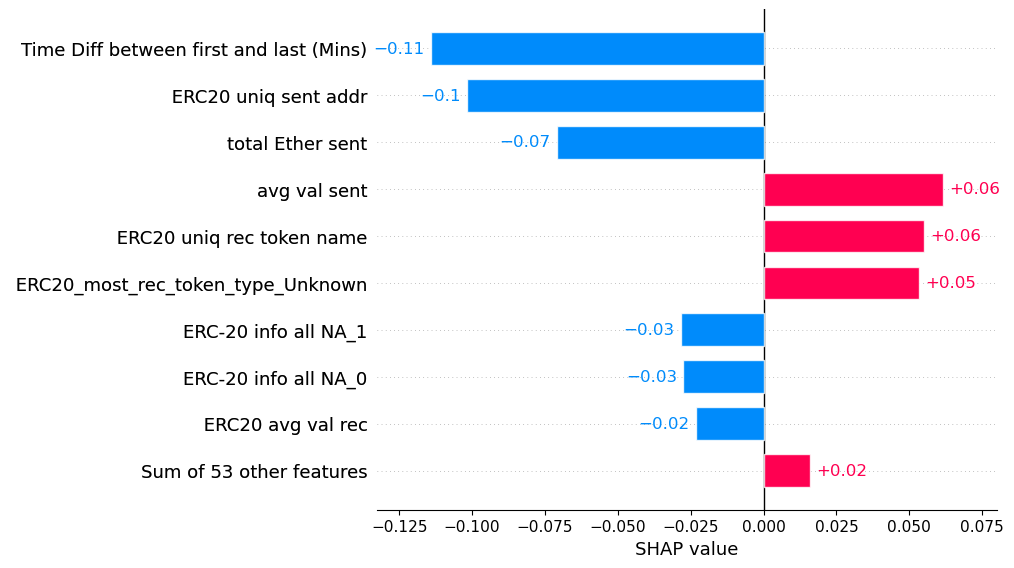

In [26]:
explainer = shap.Explainer(lr.predict,X_train)
shap_values = explainer(X_test)
shap.plots.bar(shap_values[0])